In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('immo_data.csv')

In [3]:
df.head()

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.62                10.0  ...             Dortmund   
1        3.47                10.0  ...    Rhein_Pfalz_Kreis   
2        2.72                 2.4  ...              Dresden   
3        1.53                40.0  ...  Mittelsachsen_Kreis   
4        2.46                 NaN  ...               Bremen   

                       regio3  \
0                     Schüren   
1              Böhl_Iggelheim   
2  Äußere_Neustadt_Antonstadt   
3                    Freiberg   
4           Neu_Schwachhausen   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   
1  Alles neu macht der Mai – so kann es auch für ...   
2  Der Neubau entsteht im Herzen der Dresdner Neu...   
3  Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4  Es handelt sich hier um ein saniertes Mehrfami...   

                                          facilities heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...          NaN   
1                                                NaN          NaN   
2  * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...          NaN   
3                                                NaN        87.23   
4  Diese Wohnung wurde neu saniert und ist wie fo...          NaN   

   energyEfficiencyClass lastRefurbish  electricityBasePrice  \
0                    NaN           NaN                   NaN   
1                    NaN        2019.0                   NaN   
2                    NaN           NaN                   NaN   
3                    NaN           NaN                   NaN   
4                    NaN           NaN                   NaN   

   electricityKwhPrice   date  
0                  NaN  May19  
1                  NaN  May19  
2                  NaN  Oct19  
3                  NaN  May19  
4                  NaN  Feb20  

[5 rows x 49 columns]

In [5]:
len(df)

268850

In [6]:
df.shape

(268850, 49)

In [4]:
df.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [8]:
df = df.fillna(0)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [10]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [14]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [19]:
len(df)

252291

In [20]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
268844    False
268845    False
268846    False
268848    False
268849    False
Length: 252291, dtype: bool

In [21]:
df.drop_duplicates()

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268844  Nordrhein_Westfalen          80.00                     gas_heating   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       0.0       False    False   
1       ONE_YEAR_FREE                       0.0       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       0.0       False     True   
4                   0                       0.0       False     True   
...               ...                       ...         ...      ...   
268844  ONE_YEAR_FREE                      10.0       False    False   
268845  ONE_YEAR_FREE                       0.0       False     True   
268846              0                       0.0       False     True   
268848              0                       0.0        True     True   
268849              0                       0.0       False     True   

        picturecount  pricetrend  telekomUploadSpeed  ...  \
0                  6        4.62                10.0  ...   
1                  8        3.47                10.0  ...   
2                  8        2.72                 2.4  ...   
3                  9        1.53                40.0  ...   
4                 19        2.46                 0.0  ...   
...              ...         ...                 ...  ...   
268844            12        2.58                 2.4  ...   
268845             0        2.74                10.0  ...   
268846            12        6.49                 0.0  ...   
268848            16        4.39                 0.0  ...   
268849             9        5.00                 0.0  ...   

                         regio2                      regio3  \
0                      Dortmund                     Schüren   
1             Rhein_Pfalz_Kreis              Böhl_Iggelheim   
2                       Dresden  Äußere_Neustadt_Antonstadt   
3           Mittelsachsen_Kreis                    Freiberg   
4                        Bremen           Neu_Schwachhausen   
...                         ...                         ...   
268844                    Essen                       Horst   
268845  Weilheim_Schongau_Kreis                    Eberfing   
268846         Bergstraße_Kreis                   Viernheim   
268848                     Köln                   Dellbrück   
268849        Frankfurt_am_Main                  Sossenheim   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
1       Alles neu macht der Mai – so kann es auch für ...   
2       Der Neubau entsteht im Herzen der Dresdner Neu...   
3       Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4       Es handelt sich hier um ein saniertes Mehrfami...   
...                                                   ...   
268844  Bei dieser ansprechenden Immobilie handelt es ...   
268845  Diese schöne, neuwertige Wohnung im Dachgescho...   
268846  Hier wird eine Wohnung im 2 Familienhaus angeb...   
268848  Neubau Erstbezug, gehobener Standard, alle Ein...   
268849  Schöne, helle, gut geschnittene und teilmöblie... 

In [32]:
#Deleting  Outliers
df = df[df.baseRent.between(50,10000, inclusive=True)]
df = df[df.noRooms.between(0,15, inclusive=True)]
df = df[df.livingSpace.between(50,30000, inclusive=True)]

df.shape

/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_65474/654315507.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.baseRent.between(50,10000, inclusive=True)]
/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_65474/654315507.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.noRooms.between(0,15, inclusive=True)]
/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_65474/654315507.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.livingSpace.between(50,30000, inclusive=True)]


(204890, 49)

<AxesSubplot:>

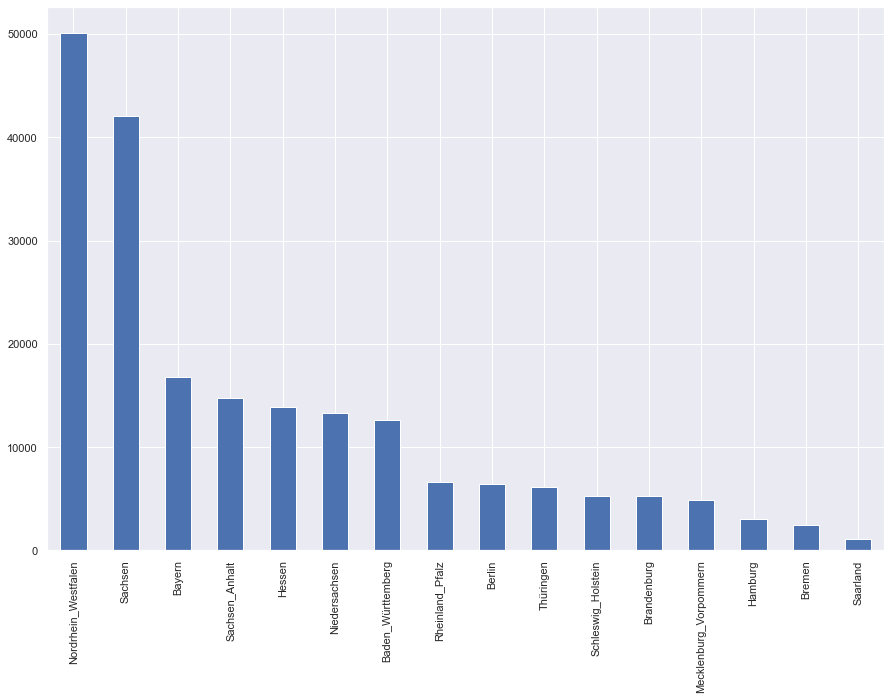

In [27]:
df['regio1'].value_counts().plot(kind='bar')


Text(0, 0.5, 'Regions')

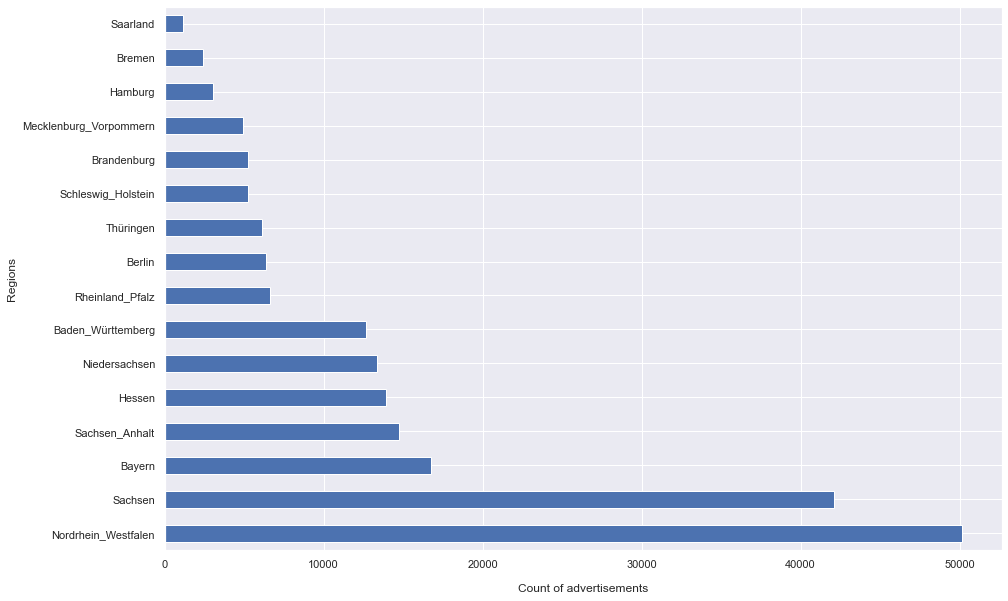

In [28]:
#sns.set(font_scale=1.4)
df['regio1'].value_counts().plot(kind='barh', figsize=(15, 10), rot=0)
plt.xlabel("Count of advertisements", labelpad=14)
plt.ylabel("Regions", labelpad=5)

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['livingSpace'],kde_kws={"label": 'livingSpace'}, bins=20)


/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingSpace', ylabel='Density'>

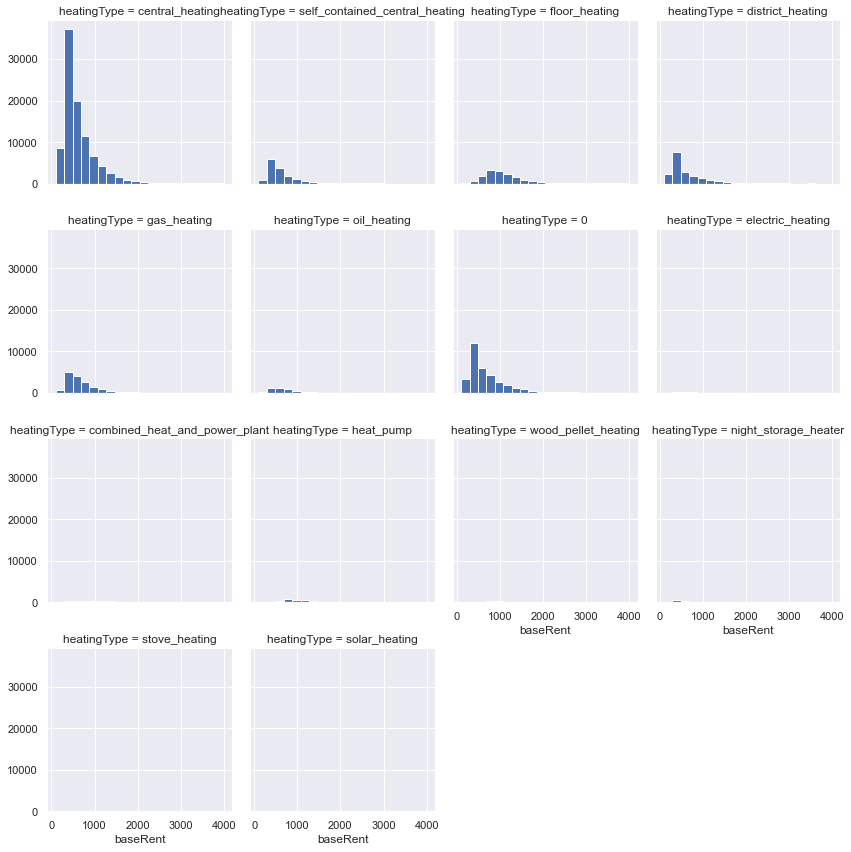

In [39]:
g = sns.FacetGrid(df, col='heatingType', col_wrap=4)
g = g.map(plt.hist, 'baseRent', bins=20, range=(100,4000))

In [36]:
dff=df[df.yearConstructed >=100]
plt.figure(figsize=(10,5))
plt.scatter(x='yearConstructed', y='baseRent', data=dff)
plt.title('Price by Year of Construction')
plt.xlabel('Year of Construction')
plt.ylabel('Price')
plt.show()

In [38]:
plt.figure(figsize=(10,5))

sns.histplot(df.baseRent , kde=True)

<AxesSubplot:xlabel='baseRent', ylabel='Count'>

<AxesSubplot:xlabel='baseRent', ylabel='Count'>

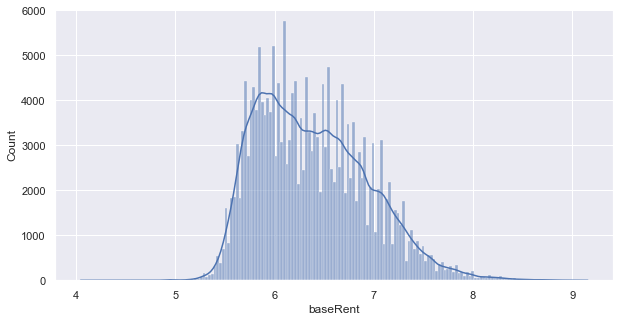

In [42]:
plt.figure(figsize=(10,5))

sns.histplot(np.log(df.baseRent) , kde=True)

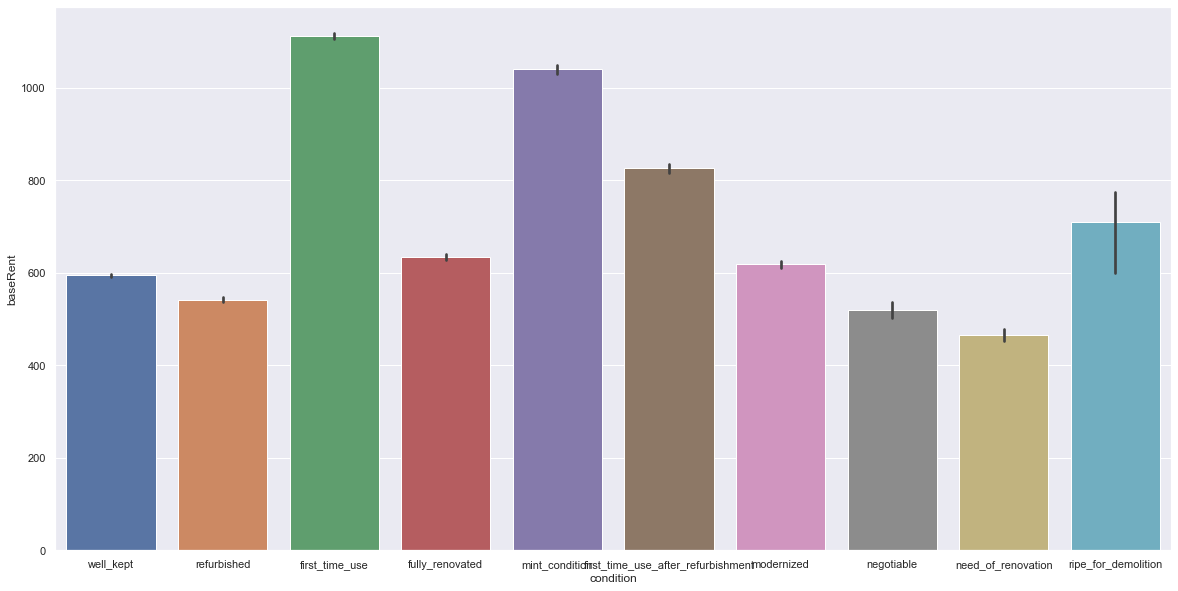

In [45]:
plt.figure(figsize=(20,10))
dff=df[df.condition!= 0]
sns.barplot(x=dff.condition, y=dff.baseRent)
plt.show()

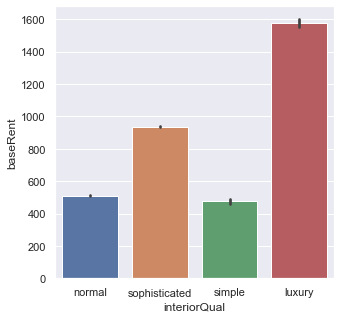

In [47]:
plt.figure(figsize=(5,5))
dff=df[df.interiorQual!= 0]

sns.barplot(x=dff.interiorQual, y=dff.baseRent)
plt.show()

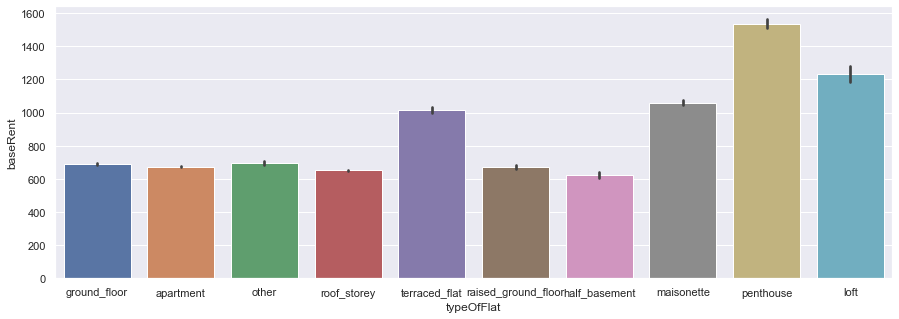

In [48]:
plt.figure(figsize=(15,5))
dff=df[df.typeOfFlat!= 0]

sns.barplot(x=dff.typeOfFlat, y=dff.baseRent)
plt.show()

<AxesSubplot:title={'center':'average price by neighybourhood'}, xlabel='regio1'>

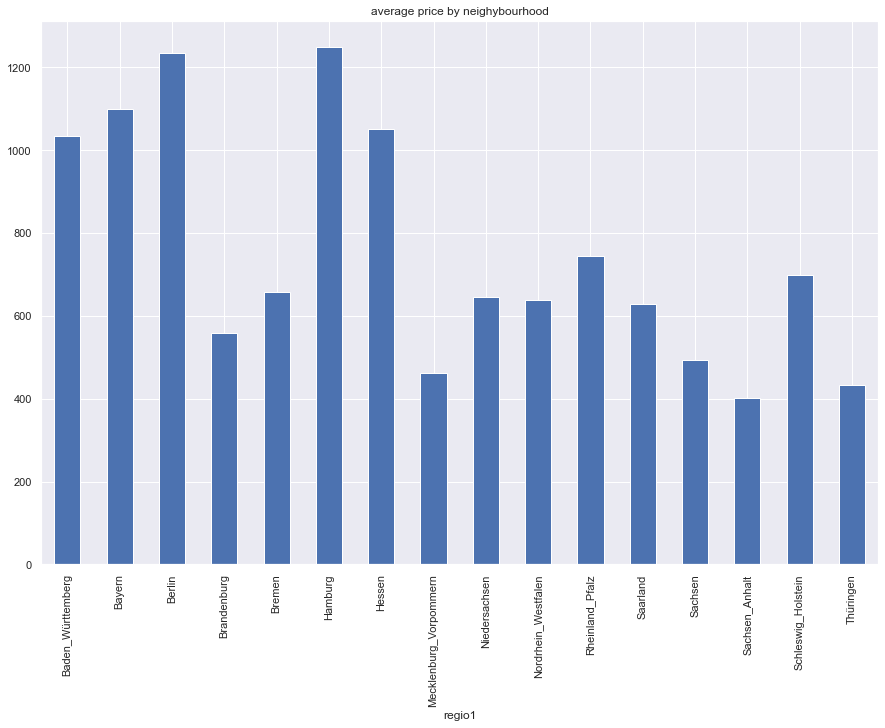

In [55]:
price_mean=df.groupby(['regio1'])['baseRent'].mean()
price_mean.plot.bar(title='average price by neighybourhood' )

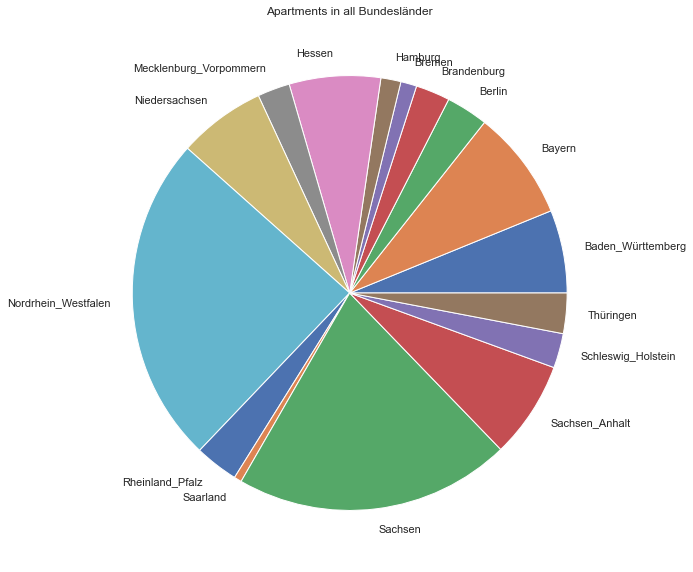

In [57]:
plot = df.groupby(by = 'regio1').count().plot.pie(y='regio2', figsize=(10, 10), legend=False, label = "",labeldistance=1.1,title = 'Apartments in all Bundesländer')

prediction

In [86]:
X = df.drop(columns = ['totalRent','pricetrend','baseRentRange']) # prevent data leaking
X = X.drop(columns = ['geo_bln','houseNumber','street','streetPlain','description','geo_krs','geo_plz','date','noRooms','newlyConst','yearConstructed','livingSpace']) # data irrelavent or redundant to prediction
X = X.drop(columns = ['telekomHybridUploadSpeed']) # too much na values



cols = ['regio1',
        'typeOfFlat','livingSpaceRange','noRoomsRange','floor','numberOfFloors','lift','balcony','garden','hasKitchen','cellar','noParkSpaces',
        'petsAllowed','condition','facilities','interiorQual',
        'serviceCharge','heatingType','firingTypes','thermalChar','heatingCosts','electricityBasePrice','electricityKwhPrice','energyEfficiencyClass',
        'telekomTvOffer','telekomUploadSpeed',
        'yearConstructedRange', 'lastRefurbish',
         'picturecount',
        'baseRent'
 ]
X = X[cols]

X.head()

regio1    typeOfFlat  livingSpaceRange  noRoomsRange  floor  \
0  Nordrhein_Westfalen  ground_floor                 4             4    1.0   
1      Rheinland_Pfalz  ground_floor                 4             3    0.0   
2              Sachsen     apartment                 4             3    3.0   
3              Sachsen         other                 2             3    3.0   
4               Bremen     apartment                 4             3    1.0   

   numberOfFloors   lift  balcony  garden  hasKitchen  ...  heatingCosts  \
0             3.0  False    False    True       False  ...          0.00   
1             0.0  False     True   False       False  ...          0.00   
2             4.0   True     True   False       False  ...          0.00   
3             0.0  False     True   False       False  ...         87.23   
4             0.0  False     True   False       False  ...          0.00   

   electricityBasePrice electricityKwhPrice energyEfficiencyClass  \
0                   0.0                 0.0                     0   
1                   0.0                 0.0                     0   
2                   0.0                 0.0                     0   
3                   0.0                 0.0                     0   
4                   0.0                 0.0                     0   

  telekomTvOffer telekomUploadSpeed  yearConstructedRange lastRefurbish  \
0  ONE_YEAR_FREE               10.0                   2.0           0.0   
1  ONE_YEAR_FREE               10.0                   1.0        2019.0   
2  ONE_YEAR_FREE                2.4                   9.0           0.0   
3  ONE_YEAR_FREE               40.0                   2.0           0.0   
4              0                0.0                   1.0           0.0   

  picturecount  baseRent  
0            6     595.0  
1            8     800.0  
2            8     965.0  
3            9     343.0  
4           19     765.0  

[5 rows x 30 columns]

In [87]:
X.columns
bool_cols = X.select_dtypes("bool").columns.tolist()
cat_cols = X.select_dtypes("object").columns.tolist()
num_cols = X.select_dtypes("number").columns.tolist()
bivariate_cols = ['floor', 'numberOfFloors', 'noParkSpaces', 'serviceCharge', 'thermalChar', 'picturecount']
num_cat_cols = [c for c in num_cols if c not in bivariate_cols]
print(num_cols)



X.typeOfFlat.unique() #one-hit encoding
X.petsAllowed.unique() #ordinal encoding
X.condition.unique() #ordinal encoding
X.interiorQual.unique() #one-hit/ordinal encoding
X.heatingType.unique() #one-hit encoding (14)
X.firingTypes.unique() #too many categories
X = X.drop(columns = ['firingTypes'])
X.telekomTvOffer.unique() #ordinal encoding

['livingSpaceRange', 'noRoomsRange', 'floor', 'numberOfFloors', 'noParkSpaces', 'serviceCharge', 'thermalChar', 'heatingCosts', 'electricityBasePrice', 'electricityKwhPrice', 'telekomUploadSpeed', 'yearConstructedRange', 'lastRefurbish', 'picturecount', 'baseRent']


array(['ONE_YEAR_FREE', 0, 'NONE', 'ON_DEMAND'], dtype=object)

In [88]:
X.balcony = X.balcony.astype(np.int64)
X.garden = X.garden.astype(np.int64)
X.hasKitchen = X.hasKitchen.astype(np.int64)
X.cellar = X.cellar.astype(np.int64)

pets_dict = {'no': 0, 'negotiable': 0.5, 'yes' : 1}
X.petsAllowed = X.petsAllowed.map(pets_dict)

condition_dict = {'ripe_for_demolition': -2, 'need_of_renovation': -1, 'unknown': 0, 'negotiable': 0.5, 'modernized': 1, 'first_time_use_after_refurbishment': 2, 
                  'mint_condition': 2, 'fully_renovated': 3, 'first_time_use': 4, 'refurbished': 1.5, 'well_kept': 2.5}
X.condition = X.condition.map(condition_dict)

tv_dict = {'NONE': 0, 'ON_DEMAND': 0.5, 'ONE_YEAR_FREE' : 1}
X.telekomTvOffer = X.telekomTvOffer.map(tv_dict)

In [89]:
X = X.drop(columns = ['electricityKwhPrice','electricityBasePrice','energyEfficiencyClass','heatingCosts','facilities','lastRefurbish']) # too much na values

values = {'noParkSpaces': 0,'petsAllowed': 'no','interiorQual':'normal', 'condition':'unknown', 'yearConstructedRange':5, 'firingTypes':'unknown','heatingType':'unknown','typeOfFlat':'unknown','telekomUploadSpeed':40,'telekomTvOffer':'NONE'}
X = X.fillna(value=values)



numberOfFloors = X.numberOfFloors.fillna(df.floor) # If there is no renovation, input built year instead
X.numberOfFloors = numberOfFloors

values = {'floor':0,'numberOfFloors':0}
X = X.fillna(value=values)

thermalChar_mean = X.thermalChar.mean()
values = {'thermalChar' : thermalChar_mean}
X = X.fillna(value=values)

In [90]:
X.groupby(by = 'numberOfFloors',dropna = False).count()

X = X.dropna()


X.head()

regio1    typeOfFlat  livingSpaceRange  noRoomsRange  floor  \
0  Nordrhein_Westfalen  ground_floor                 4             4    1.0   
1      Rheinland_Pfalz  ground_floor                 4             3    0.0   
2              Sachsen     apartment                 4             3    3.0   
3              Sachsen         other                 2             3    3.0   
4               Bremen     apartment                 4             3    1.0   

   numberOfFloors   lift  balcony  garden  hasKitchen  ...  condition  \
0             3.0  False        0       1           0  ...        2.5   
1             0.0  False        1       0           0  ...        1.5   
2             4.0   True        1       0           0  ...        4.0   
3             0.0  False        1       0           0  ...    unknown   
4             0.0  False        1       0           0  ...        1.5   

    interiorQual serviceCharge                     heatingType thermalChar  \
0         normal        245.00                 central_heating       181.4   
1         normal        134.00  self_contained_central_heating         0.0   
2  sophisticated        255.00                   floor_heating         0.0   
3              0         58.15                district_heating        86.0   
4              0        138.00  self_contained_central_heating       188.9   

   telekomTvOffer telekomUploadSpeed  yearConstructedRange picturecount  \
0             1.0               10.0                   2.0            6   
1             1.0               10.0                   1.0            8   
2             1.0                2.4                   9.0            8   
3             1.0               40.0                   2.0            9   
4            NONE                0.0                   1.0           19   

   baseRent  
0     595.0  
1     800.0  
2     965.0  
3     343.0  
4     765.0  

[5 rows x 23 columns]

In [91]:
X.groupby(by = 'floor').count()

X = X.drop(X[X.floor > 30].index)

X = X.drop(X[X.numberOfFloors > 30].index)

X = X.drop(X[X.baseRent > 1300].index)
X = X.drop(X[X.baseRent < 200].index)


X.lift = X.lift.astype(np.int64)

y = X.baseRent
X = X.drop(columns = ['baseRent'])

X.head()

regio1    typeOfFlat  livingSpaceRange  noRoomsRange  floor  \
0  Nordrhein_Westfalen  ground_floor                 4             4    1.0   
1      Rheinland_Pfalz  ground_floor                 4             3    0.0   
2              Sachsen     apartment                 4             3    3.0   
3              Sachsen         other                 2             3    3.0   
4               Bremen     apartment                 4             3    1.0   

   numberOfFloors  lift  balcony  garden  hasKitchen  ...  petsAllowed  \
0             3.0     0        0       1           0  ...           no   
1             0.0     0        1       0           0  ...          0.0   
2             4.0     1        1       0           0  ...           no   
3             0.0     0        1       0           0  ...           no   
4             0.0     0        1       0           0  ...           no   

   condition   interiorQual serviceCharge                     heatingType  \
0        2.5         normal        245.00                 central_heating   
1        1.5         normal        134.00  self_contained_central_heating   
2        4.0  sophisticated        255.00                   floor_heating   
3    unknown              0         58.15                district_heating   
4        1.5              0        138.00  self_contained_central_heating   

   thermalChar telekomTvOffer  telekomUploadSpeed yearConstructedRange  \
0        181.4            1.0                10.0                  2.0   
1          0.0            1.0                10.0                  1.0   
2          0.0            1.0                 2.4                  9.0   
3         86.0            1.0                40.0                  2.0   
4        188.9           NONE                 0.0                  1.0   

   picturecount  
0             6  
1             8  
2             8  
3             9  
4            19  

[5 rows x 22 columns]

In [92]:
for i in X.columns:
    print(i)

regio1
typeOfFlat
livingSpaceRange
noRoomsRange
floor
numberOfFloors
lift
balcony
garden
hasKitchen
cellar
noParkSpaces
petsAllowed
condition
interiorQual
serviceCharge
heatingType
thermalChar
telekomTvOffer
telekomUploadSpeed
yearConstructedRange
picturecount


In [93]:
X=pd.get_dummies(X , drop_first=True)
X.head()

livingSpaceRange  noRoomsRange  floor  numberOfFloors  lift  balcony  \
0                 4             4    1.0             3.0     0        0   
1                 4             3    0.0             0.0     0        1   
2                 4             3    3.0             4.0     1        1   
3                 2             3    3.0             0.0     0        1   
4                 4             3    1.0             0.0     0        1   

   garden  hasKitchen  cellar  noParkSpaces  ...  heatingType_heat_pump  \
0       1           0       1           1.0  ...                      0   
1       0           0       0           2.0  ...                      0   
2       0           0       1           1.0  ...                      0   
3       0           0       0           0.0  ...                      0   
4       0           0       0           0.0  ...                      0   

   heatingType_night_storage_heater  heatingType_oil_heating  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   heatingType_self_contained_central_heating  heatingType_solar_heating  \
0                                           0                          0   
1                                           1                          0   
2                                           0                          0   
3                                           0                          0   
4                                           1                          0   

   heatingType_stove_heating  heatingType_wood_pellet_heating  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   telekomTvOffer_0.5  telekomTvOffer_1.0  telekomTvOffer_NONE  
0                   0                   1                    0  
1                   0                   1                    0  
2                   0                   1                    0  
3                   0                   1                    0  
4                   0                   0                    1  

[5 rows x 72 columns]

In [94]:
X.shape

(186021, 72)

In [95]:
from sklearn.model_selection import train_test_split

# split train,validation and test sets
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y,
                                                      train_size=0.6, test_size=0.4,
                                                      random_state=0)

X_test, X_valid, y_test, y_valid = train_test_split(X_valid_test, y_valid_test,
                                                      train_size=0.5, test_size=0.5,
                                                      random_state=0)


print('shapes of train, validation and test sets: ',X_train.shape, X_valid.shape, X_test.shape)

shapes of train, validation and test sets:  (111612, 72) (37205, 72) (37204, 72)


In [96]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


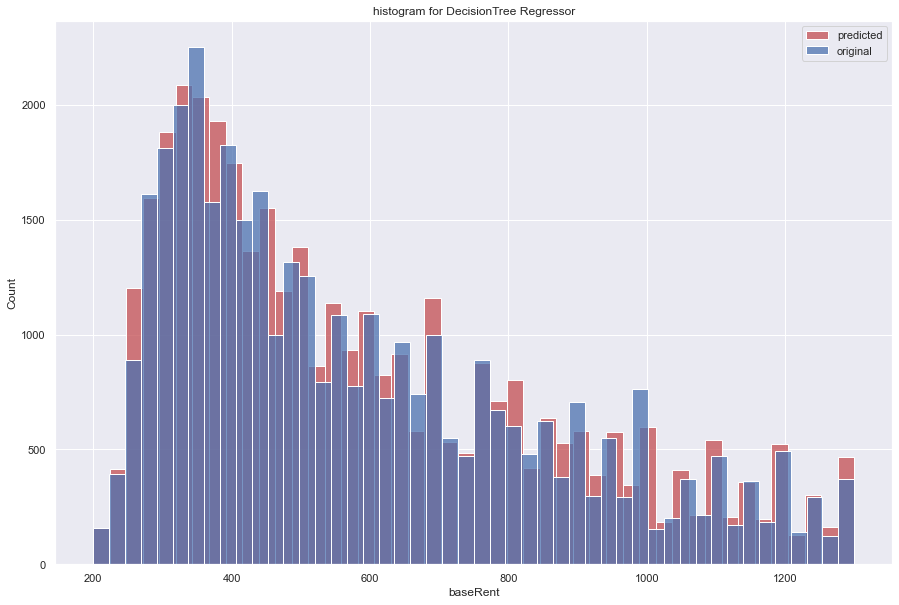

In [119]:
sns.histplot(y_pred , color='r' , label='predicted')
sns.histplot(y_test ,  color='b' , label='original')
plt.title('histogram for DecisionTree Regressor')
plt.legend()

In [116]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
r2_score(y_test, y_pred)

0.7140094162393901

In [118]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
r2_score(y_test, y_pred)

0.5185673161443063

In [101]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
r2_score(y_test, y_pred)

0.7639419719409484

dask

In [102]:
import dask.dataframe as dd

In [109]:
! pip install -U textBlob


In [121]:
#from textblob import textBlob

In [120]:
pip install multiprocesspandas


     |████████████████████████████████| 126 kB 32 kB/s eta 0:00:01
     |████████████████████████████████| 86 kB 13 kB/s eta 0:00:015
Note: you may need to restart the kernel to use updated packages.


In [122]:
from multiprocesspandas import applyparallel


In [124]:
df.head(2)

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen          245.0                 central_heating   
1      Rheinland_Pfalz          134.0  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       0.0       False    False             6   
1  ONE_YEAR_FREE                       0.0       False     True             8   

   pricetrend  telekomUploadSpeed  ...             regio2          regio3  \
0        4.62                10.0  ...           Dortmund         Schüren   
1        3.47                10.0  ...  Rhein_Pfalz_Kreis  Böhl_Iggelheim   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   
1  Alles neu macht der Mai – so kann es auch für ...   

                                          facilities heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...          0.0   
1                                                  0          0.0   

   energyEfficiencyClass lastRefurbish  electricityBasePrice  \
0                      0           0.0                   0.0   
1                      0        2019.0                   0.0   

   electricityKwhPrice   date  
0                  0.0  May19  
1                  0.0  May19  

[2 rows x 49 columns]

In [126]:
def func(x):
    import pandas as pd
    return pd.Series([x['baseRent'].mean()])

df.groupby(["regio1","heatingType"]).apply_parallel(func, num_processes=30)

regio1            heatingType                                                    
Baden_Württemberg 0                               0    1109.883131
dtype: float64
                  central_heating                  0    973.901362
dtype: float64
                  combined_heat_and_power_plant    0    1129.43914
dtype: float64
                  district_heating                0    1133.811405
dtype: float64
                  electric_heating                 0    759.875288
dtype: float64
...                                                                           ...
Thüringen         oil_heating                      0    390.148605
dtype: float64
                  self_contained_central_heating   0    464.307422
dtype: float64
                  solar_heating                         0    549.0
dtype: float64
                  stove_heating                         0    397.5
dtype: float64
                  wood_pellet_heating              0    475.384667
dtype: float64

[221 rows x 1 columns]

In [128]:
df.groupby(["regio1","heatingType"]).mean()['baseRent']

regio1             heatingType                   
Baden_Württemberg  0                                 1109.883131
                   central_heating                    973.901362
                   combined_heat_and_power_plant     1129.439140
                   district_heating                  1133.811405
                   electric_heating                   759.875288
                                                        ...     
Thüringen          oil_heating                        390.148605
                   self_contained_central_heating     464.307422
                   solar_heating                      549.000000
                   stove_heating                      397.500000
                   wood_pellet_heating                475.384667
Name: baseRent, Length: 221, dtype: float64

In [136]:
import dask.dataframe as dd

In [134]:
a=da.random.randint(10 , 100 , 100)

In [135]:
a.compute()

array([90, 60, 17, 94, 43, 38, 55, 63, 62, 16, 73, 83, 53, 77, 84, 77, 98,
       45, 72, 31, 35, 27, 65, 94, 53, 54, 34, 11, 14, 94, 79, 55, 76, 80,
       20, 74, 28, 43, 94, 95, 31, 37, 19, 14, 68, 83, 58, 79, 89, 49, 16,
       97, 18, 68, 64, 15, 89, 60, 11, 95, 99, 20, 87, 29, 40, 80, 55, 95,
       81, 49, 54, 65, 73, 15, 98, 13, 19, 12, 71, 48, 15, 73, 55, 45, 99,
       69, 18, 30, 57, 18, 43, 41, 57, 66, 89, 75, 90, 14, 34, 46])

In [160]:
ddf = dd.read_csv('immo_data.csv',dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [162]:
#ddf.head()

In [156]:
pip install pyspark

     |                                | 471 kB 3.7 kB/s eta 20:49:15:02:20ERROR: Exception:
Traceback (most recent call last):
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/http/client.py", line 462, in read
    n = self.readinto(b)
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/http/client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/Users/yeganeh/opt/anaconda3/lib/python3.9/ssl.py",

In [163]:
import pyspark

ModuleNotFoundError: No module named 'pyspark'